# Defintion of Node Class and Associated Functions
Each node consists of
- Data/key
- Count of the occurrences of the data/key
- Pointer to the first child
- Pointer to an adjacent sibling

In [1]:
!pip install pydotplus

In [2]:
!pip install graphviz

In [3]:
class Node:
    
    def __init__(self, key = None):
        """Each node consists of a data/key, count of the occurrences of the data/key
        pointer to the first child, pointer to an adjacent sibling"""
        self.data = key
        self.count = 1
        self.child = None
        self.next = None
        
    def incrementCount(self):
        """Increments the count of the data or key associated with the node"""
        self.count += 1
    
    def setChild(self, child):
        """Set the child pointer to the first child"""
        self.child = child
    
    def setNext(self, sibling):
        """Sets the next pointer to the next sibling"""
        self.next = sibling
    
    def getData(self):
        """Returns the data or key associated with the node"""
        return(self.data)
    
    def getCount(self):
        """Returns the count of the data or key associated with the node"""
        return(self.count)
    
    def getChild(self):
        """Returns the first child of the node"""
        return(self.child)
    
    def getNext(self):
        """Returns the adjacent sibling of the node"""
        return(self.next)  
    
    def setProb(self, parent_count):
        self.prob = float(self.count) / float(parent_count)

###### Setting the path for libraries required for visualizing a tree

In [4]:
import os
os.environ['PATH'] = os.environ['PATH'] + ';' + os.environ['CONDA_PREFIX'] + r"\Library\bin\graphviz"

##### Importing libraries required for visualizing a tree

In [5]:
import pydotplus
from IPython.display import Image, display, clear_output

##### Defintion of Probabilistic Suffix Tree Class and Associated Functions
It is a generic tree with an empty root node.

To keep the number of pointers in a node constant
- All the children of a particular parent are in a linked list
- The parent points only to the first node (head) of the linked list
- A new child is added at the beginning of the linked list

In [6]:
import time

class PST:
    
    def __init__(self):
        """Initialize tree with empty root node"""
        self.root = Node()
    
    def find(self, current, key):
        """Finds the node with the given key"""
        while(current != None):
            if(current.getData() == key):
                return(current)
            current = current.getNext()
        return(current)
    
    def fit(self, data, size):
        """ Build a tree on the given data """
        start = time.time()
        if(type(data) != list and type(data) != str):
            print("Could not fit the data.")
            print("Data should be string type or 1D list.")
            if(type(size) != int):
                print("Buffer size should be an integer.")
        elif(type(size) != int):
            print("Could not fit the data.")
            print("Buffer size should be an integer.")
        else:
            for i in range(len(data)):
                S = data[i:i+size]
                parent = self.root
                for j in range(len(S)):
                    #self.show()
                    current = parent.getChild()
                    temp = self.find(current, S[j])
                    if(temp != None):
                        temp.incrementCount()
                    else:
                        temp = Node(S[j])
                        temp.setNext(current)
                        parent.setChild(temp)
                    parent = temp
                    temp.setProb(parent.getCount())
            print("Fit complete in %0.4f s" %(time.time()-start))           
    
    def show(self):
        """Creates a DOT file of the tree and displays the tree"""
        f = open("PST.dot", 'w')
        f.write("graph PST {\n")
        f.write("node0" + "[label = Root];\n")
        temp = [self.root]
        index = [0]
        j = 1
##########################################################################        
        total_count = 0
##########################################################################     
        while(len(temp)):
            parent = temp.pop(0)
            i = index.pop(0)
            current = parent.getChild()
            while(current != None):
                total_count += current.getCount()
                f.write("node" + str(j) + "[label = " + str(current.getData()) + "];\n")
                f.write("\"node" + str(i) + "\" -- " + "\"node" + str(j) + 
                        "\"[label = " + str(current.getCount()) + ", "+
##########################################################################                         
                        "prob = " + str(round(float(current.getCount())/total_count, 2)) + "]" + ";\n")
########################################################################## 
                temp.append(current)
                current = current.getNext()
                index.append(j)
                j += 1
        f.write("}")
        f.close()
        graph = pydotplus.graph_from_dot_file("PST.dot")
        graph.set_size('"100,100!"')
        clear_output(wait=True)
        display(Image(graph.create_png()))
        graph.write_png("PST.png")

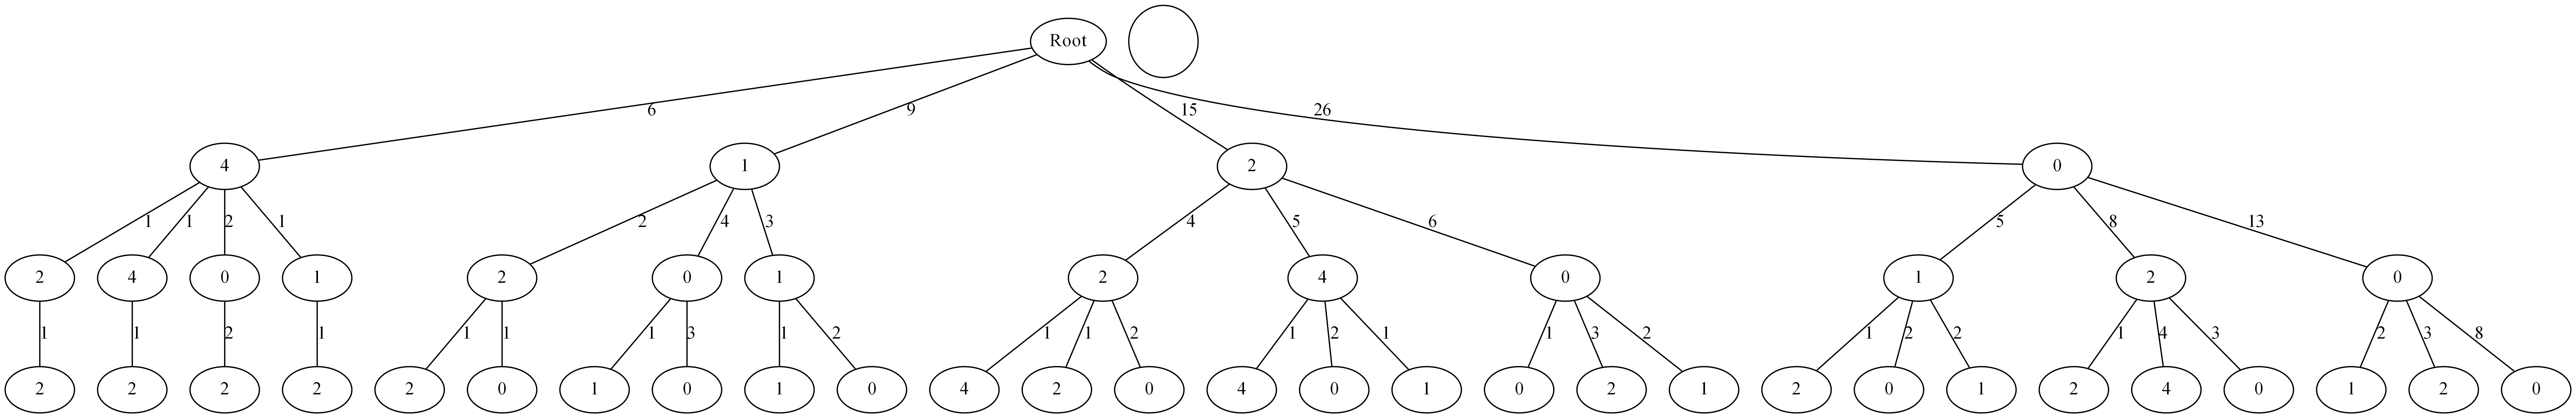

In [8]:
Go_Straight_PST = PST()
Go_Straight_PST.fit("00000201100001010002412024020220012220240201110000244224", 3)
Go_Straight_PST.show()


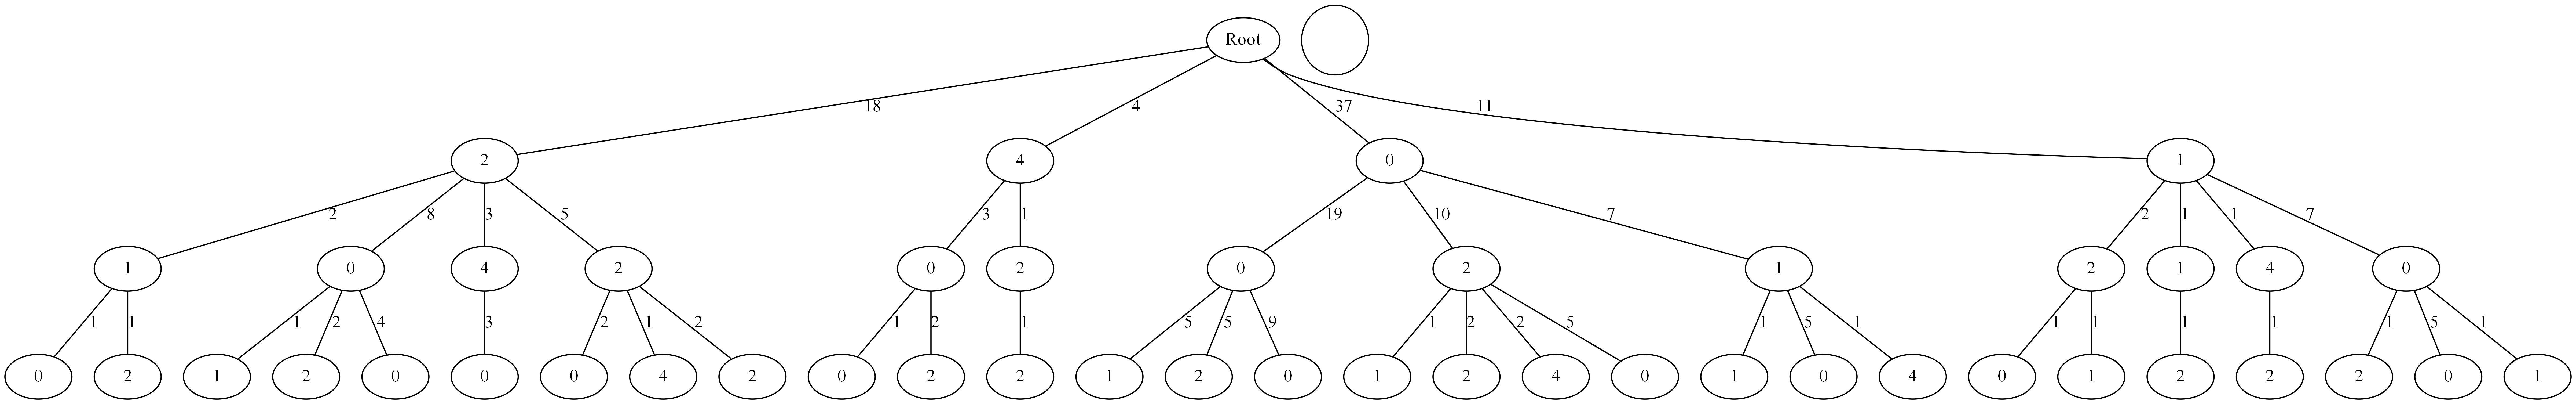

In [10]:
Idle_PST = PST()
Idle_PST.fit("1014222240200024000100100000112120010001002202000020201021002200024020", 3)
Idle_PST.show()

In [ ]:
Trun_left_PST = PST()
Trun_left_PST.fit("424402402114244042122100002240204002222440222020042142201122004104140201012", 4)
Trun_left_PST.show()